In [1]:
import mne

In [2]:
%matplotlib qt

In [3]:
mne.set_log_level('INFO')

In [4]:
mne.set_config('MNE_LOGGING_LEVEL', 'WARNING', set_env=True)

In [5]:
mne.get_config_path()

'/home/muditdhawan/.mne/mne-python.json'

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import chart_studio.plotly as py

In [7]:
raw_fname = '/home/muditdhawan/Desktop/EEG/eeg-during-mental-arithmetic-tasks-1.0.0/Subject00_2.edf'

In [8]:
raw = mne.io.read_raw_edf(raw_fname)

Extracting EDF parameters from /home/muditdhawan/Desktop/EEG/eeg-during-mental-arithmetic-tasks-1.0.0/Subject00_2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [9]:
print(raw.ch_names)
print(raw.info)

['EEG Fp1', 'EEG Fp2', 'EEG F3', 'EEG F4', 'EEG F7', 'EEG F8', 'EEG T3', 'EEG T4', 'EEG C3', 'EEG C4', 'EEG T5', 'EEG T6', 'EEG P3', 'EEG P4', 'EEG O1', 'EEG O2', 'EEG Fz', 'EEG Cz', 'EEG Pz', 'EEG A2-A1', 'ECG ECG']
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1, EEG Fp2, EEG F3, EEG F4, EEG F7, EEG F8, EEG T3, EEG ...
 chs: 21 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 45.0 Hz
 meas_date: 2011-01-01 00:00:00 UTC
 nchan: 21
 projs: []
 sfreq: 500.0 Hz
>


In [10]:
start, stop = raw.time_as_index([30, 45])  # 30 s to 45 s data segment
data, times = raw[:, start:stop]  # access underlying data
print(data.shape)
print(times.shape)

(21, 7500)
(7500,)


In [11]:
raw.plot()
import matplotlib.pyplot as plt
plt.plot(times, data.T)
plt.xlabel('time (s)')
plt.ylabel('EEG data (T)')

Text(34.44444444444444, 0.5, 'EEG data (T)')

In [12]:
raw.load_data()

Reading 0 ... 30999  =      0.000 ...    61.998 secs...


<RawEDF | Subject00_2.edf, 21 x 31000 (62.0 s), ~5.0 MB, data loaded>

In [13]:
rawcopy = raw.copy() 

In [14]:
def define_events(raw, max_length, dist_bw_events):
    sample_no_event = np.arange(0, max_length, dist_bw_events).transpose()
    sample_no_event = sample_no_event.reshape(sample_no_event.shape[0],1)
    duration_event = np.zeros_like(sample_no_event)
    int_event_code = duration_event + 1
    events = np.concatenate((sample_no_event , duration_event, int_event_code), axis = 1)
    return events

In [15]:
events = define_events(raw, 30000, 250)

In [16]:
events.shape

(120, 3)

In [17]:
# to set the default stim channel to use for finding events
mne.set_config('MNE_STIM_CHANNEL', 'STI101', set_env=True)

In [18]:
tmin = 0.1  # start of each epoch (200ms before the trigger)
tmax = 0.1  # end of each epoch (500ms after the trigger)

In [19]:
baseline = (None, 0)  # means from the first instant to t = 0

In [20]:
epochs = mne.Epochs(raw, events, event_id=1, tmin=-0.5, tmax=0.5, proj=True, baseline=baseline)

120 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


In [21]:
print(epochs)

<Epochs  |   120 events (good & bad), -0.5 - 0.5 sec, baseline [None, 0], ~46 kB, data not loaded,
 '1': 120>


In [22]:
epochs_data = epochs.get_data()
print(epochs_data.shape)

Loading data for 120 events and 501 original time points ...
1 bad epochs dropped
(119, 21, 501)


In [23]:
psds, freqs = mne.time_frequency.psd_welch(epochs, n_fft = 128, average='mean')

Loading data for 119 events and 501 original time points ...
Effective window size : 0.256 (s)


In [24]:
print(freqs.shape)

(65,)


In [25]:
print(freqs)

[  0.        3.90625   7.8125   11.71875  15.625    19.53125  23.4375
  27.34375  31.25     35.15625  39.0625   42.96875  46.875    50.78125
  54.6875   58.59375  62.5      66.40625  70.3125   74.21875  78.125
  82.03125  85.9375   89.84375  93.75     97.65625 101.5625  105.46875
 109.375   113.28125 117.1875  121.09375 125.      128.90625 132.8125
 136.71875 140.625   144.53125 148.4375  152.34375 156.25    160.15625
 164.0625  167.96875 171.875   175.78125 179.6875  183.59375 187.5
 191.40625 195.3125  199.21875 203.125   207.03125 210.9375  214.84375
 218.75    222.65625 226.5625  230.46875 234.375   238.28125 242.1875
 246.09375 250.     ]


In [26]:
print(psds[1])

[[9.51939589e-13 9.92267065e-12 2.24764339e-12 ... 8.14611199e-18
  8.16670062e-18 4.15115656e-18]
 [3.25378392e-14 2.32992170e-12 4.13715406e-12 ... 2.69360822e-18
  2.64592010e-18 1.36354346e-18]
 [4.35755144e-13 1.84558658e-12 1.36654704e-12 ... 7.18258287e-18
  6.90212630e-18 3.49633641e-18]
 ...
 [9.17221334e-13 6.08825616e-12 3.09089161e-12 ... 1.10315242e-18
  1.15422090e-18 4.89857900e-19]
 [1.89578820e-13 1.18095574e-12 2.23564939e-12 ... 4.80083995e-18
  4.85178487e-18 2.50642973e-18]
 [2.91002140e-10 1.47320808e-09 1.55543267e-09 ... 1.14321341e-15
  1.14372104e-15 5.66312224e-16]]


Loading data for 119 events and 501 original time points ...
    Using multitaper spectrum estimation with 7 DPSS windows


<ipython-input-27-76ea68ea2526>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  epochs.plot_psd(fmin=2, fmax=200)


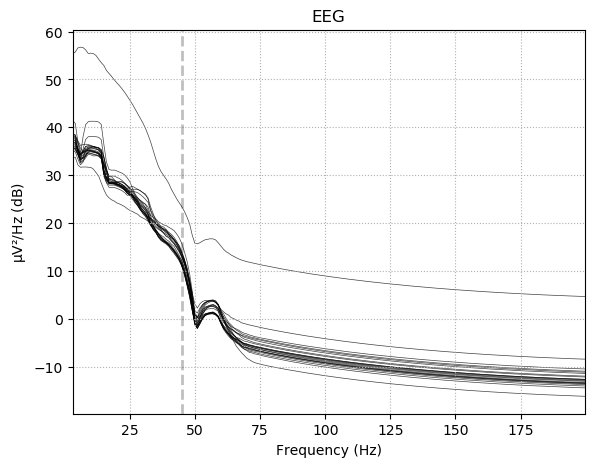

In [27]:
epochs.plot_psd(fmin=2, fmax=200)

In [28]:
#  Saving the epochs generated
# from scipy import io  # noqa
# io.savemat('epochs_data.mat', dict(epochs_data=epochs_data), oned_as='row')
# epochs.save('sample-epo.fif')

# read them with 
# saved_epochs = mne.read_epochs('sample-epo.fif')

<Evoked  |  '1' (average, N=119), [-0.5, 0.5] sec, 21 ch, ~128 kB>


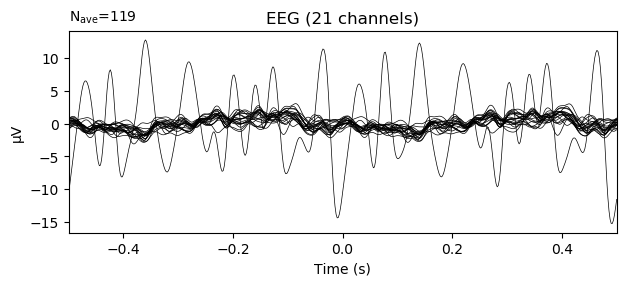

In [29]:
evoked = epochs.average()
print(evoked)
evoked.plot()

In [30]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa

In [31]:
ten_twenty_montage = mne.channels.make_standard_montage('standard_1020')
print(ten_twenty_montage)

<DigMontage | 0 extras (headshape), 0 HPIs, 3 fiducials, 94 channels>


In [32]:
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure

In [53]:
fig = ten_twenty_montage.plot(kind='3d')
print(type(fig))
print(fig.patch)
ax = fig.gca()
# ten_twenty_montage.plot(kind='topomap', show_names=False)

4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 90 unique labels.
Creating RawArray with float64 data, n_channels=90, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.
<class 'matplotlib.figure.Figure'>
Rectangle(xy=(0, 0), width=1, height=1, angle=0)


In [45]:
data

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [33]:
names = [x.split(" ")[1] for x in raw.ch_names]

In [34]:
names[-2] = 'A1'

In [35]:
exp = np.where([name in names for name in ten_twenty_montage.ch_names])[0]
print(exp)

[ 0  2 15 17 19 21 23 39 41 43 61 63 65 80 82 86 87 88 89 92]


In [36]:
chDict = {} 
for i in range(len(raw.ch_names)):
    chDict[raw.ch_names[i]] = names[i]

In [37]:
chDict

{'EEG Fp1': 'Fp1',
 'EEG Fp2': 'Fp2',
 'EEG F3': 'F3',
 'EEG F4': 'F4',
 'EEG F7': 'F7',
 'EEG F8': 'F8',
 'EEG T3': 'T3',
 'EEG T4': 'T4',
 'EEG C3': 'C3',
 'EEG C4': 'C4',
 'EEG T5': 'T5',
 'EEG T6': 'T6',
 'EEG P3': 'P3',
 'EEG P4': 'P4',
 'EEG O1': 'O1',
 'EEG O2': 'O2',
 'EEG Fz': 'Fz',
 'EEG Cz': 'Cz',
 'EEG Pz': 'Pz',
 'EEG A2-A1': 'A1',
 'ECG ECG': 'ECG'}

In [38]:
raw.rename_channels(chDict)

<RawEDF | Subject00_2.edf, 21 x 31000 (62.0 s), ~5.0 MB, data loaded>

In [39]:
raw.ch_names

['Fp1',
 'Fp2',
 'F3',
 'F4',
 'F7',
 'F8',
 'T3',
 'T4',
 'C3',
 'C4',
 'T5',
 'T6',
 'P3',
 'P4',
 'O1',
 'O2',
 'Fz',
 'Cz',
 'Pz',
 'A1',
 'ECG']

In [40]:
raw.drop_channels(['ECG'])

<RawEDF | Subject00_2.edf, 20 x 31000 (62.0 s), ~4.8 MB, data loaded>

In [41]:
raw = raw.set_montage('standard_1020')

In [42]:
epochs = mne.Epochs(raw, events, event_id=1, tmin=-0.2, tmax=0.5, proj=True, baseline=baseline)

120 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


In [43]:
evoked = epochs.average()

Loading data for 120 events and 351 original time points ...
1 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows


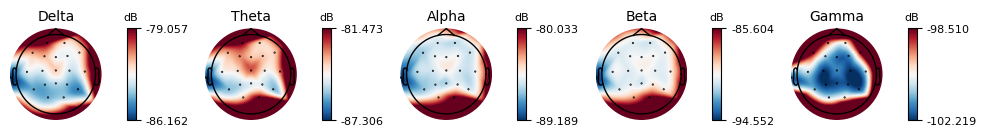

In [46]:
epochs.plot_psd_topomap()

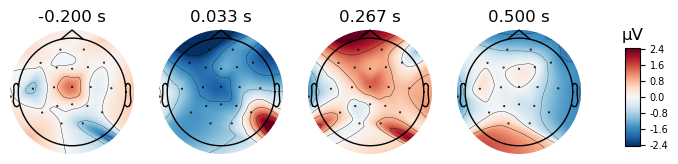

In [66]:
evoked.plot_topomap()

In [67]:
max_in_each_epoch = [e.max() for e in epochs]  # doctest:+ELLIPSIS
print(max_in_each_epoch[:4])  # doctest:+ELLIPSIS

[3.8592584428825354e-05, 3.6092525105141457e-05, 7.481457746386295e-05, 4.843442448009415e-05]


In [68]:
# Time-Frequency: Induced power and inter trial coherence
import numpy as np  # noqa
n_cycles = 2  # number of cycles in Morlet wavelet
freqs = np.arange(7, 30, 3)  # frequencies of interest

Loading data for 119 events and 351 original time points ...
No baseline correction applied


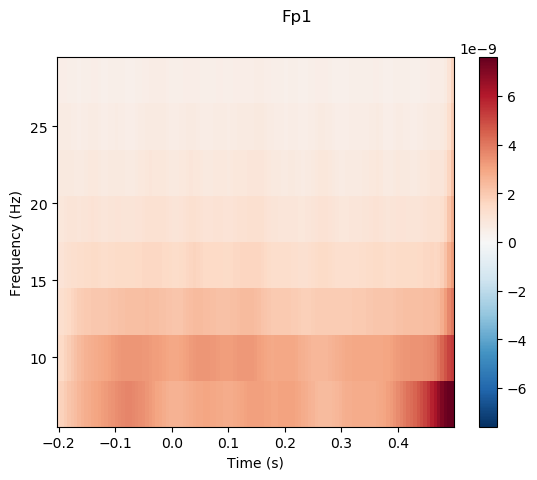

In [70]:
from mne.time_frequency import tfr_morlet  # noqa
power, itc = tfr_morlet(epochs, freqs=freqs, n_cycles=n_cycles,
                        return_itc=True, decim=3, n_jobs=1)
power.plot([power.ch_names.index('Fp1')])

In [71]:
# Inverse modeling: MNE and dSPM on evoked and raw data
# from mne.minimum_norm import apply_inverse, read_inverse_operator  # noqa

In [72]:
cov = mne.compute_covariance(epochs, method='auto')

Loading data for 119 events and 351 original time points ...
Computing rank from data with rank=None
    Using tolerance 3.8e-11 (2.2e-16 eps * 20 dim * 8.6e+03  max singular value)
    Estimated rank (eeg): 20
    EEG: rank 20 computed from 20 data channels with 0 projectors
Reducing data rank from 20 -> 20
Estimating covariance using SHRUNK
Done.
Estimating covariance using DIAGONAL_FIXED
    EEG regularization : 0.1
Done.
Estimating covariance using EMPIRICAL
Done.
Using cross-validation to select the best estimator.
    EEG regularization : 0.1
    EEG regularization : 0.1
    EEG regularization : 0.1
Number of samples used : 41769
log-likelihood on unseen data (descending order):
   shrunk: -69.213
   empirical: -69.301
   diagonal_fixed: -70.224
selecting best estimator: shrunk
[done]


In [90]:
# fwd = make_forward_solution(raw.info, fname_trans, src, bem_sol)
# inv = mne.minimum_norm.make_inverse_operator(raw.info, fwd, cov, loose=0.2)
# stc = mne.minimum_norm.apply_inverse(evoked, inv, lambda2=1. / 9.)

In [79]:
epochs_data.shape

(119, 21, 351)

In [87]:
epochs_info = epochs.info

In [88]:
epochs_info

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F3, F4, F7, F8, T3, T4, C3, C4, T5, T6, P3, P4, O1, ...
 chs: 20 EEG
 custom_ref_applied: False
 dig: 23 items (3 Cardinal, 20 EEG)
 highpass: 0.5 Hz
 lowpass: 45.0 Hz
 meas_date: 2011-01-01 00:00:00 UTC
 nchan: 20
 projs: []
 sfreq: 500.0 Hz
>